In [1]:
from typing import Dict, List, Optional, Tuple

import matplotlib.pyplot as plt
from matplotlib.pyplot import Axes
import numpy as np
import pathlib
from utils import read_json, write_json
from collections import defaultdict
import statistics

from constants import RFID_DATA_FOLDER

In [6]:
automated_testing_folder: pathlib.Path = RFID_DATA_FOLDER / "automated_test"
time_str_tested: pathlib.Path = "20220430-210104"
# data_folder: pathlib.Path = automated_testing_folder / time_str_tested
data_folder: pathlib.Path = automated_testing_folder

keys: List[str] = [
    "bottom_boxes", 
    "bottom_shelf", 
    "mid_boxes", 
    "mid_shelf", 
    "top_boxes", 
    "top_shelf"
]

moistures: List[str] = [
    '0',
    '15',
    '30',
    '45',
    '65',
    '80',
    '90'    
]

In [7]:
print(data_folder)
# print(RFID_DATA_FOLDER)

/Users/rashmilpanchani/Documents/Projects/smart_garden/src/rpi_io/sllurp-measurements/data/automated_test


In [8]:
def read_data_folder(base_dir: pathlib.Path, keys_list: List[str]) -> Dict[str, dict]: 
    moisture_level_folders: List[pathlib.Path] = [path for path in base_dir.iterdir() if path.is_dir()]
    complete_data: Dict[str, dict] = dict()

    for path in moisture_level_folders:
        if path.name == "automated_test":
            continue
        complete_data[path.name] = dict()
        for file in keys_list:
            data: dict = read_json(path / (file + ".json"))
            complete_data[path.name][file] = data
    
    return complete_data

def read_new_data_folder(base_dir: pathlib.Path, key_list: List[str], moistures: List[str]) -> Dict[str, dict]: 
    # moisture_level_folders: List[pathlib.Path] = [path for path in base_dir.iterdir()]
    complete_data: Dict[str, dict] = dict()

    for mois in moistures:
        name: str = str(mois) + "percent"
        complete_data[name] = dict()
        for file in key_list:
            data: dict = read_json(base_dir / (name + file + ".json"))
            complete_data[name][file] = data
    
    return complete_data

In [10]:
# complete_data: Dict[str, dict] = read_data_folder(RFID_DATA_FOLDER, keys)
complete_data_new: Dict[str, dict] = read_new_data_folder(data_folder, keys, moistures)

In [ ]:
print(complete_data_new)

In [11]:
# print(complete_data.keys())
# print(complete_data["0percent"].keys())
# print(complete_data["0percent"]["bottom_boxes"].keys())
# print(complete_data["0percent"]["bottom_boxes"]["min_Tx_power"].keys())
# print(complete_data["0percent"]["bottom_boxes"]["rssi_vals"].keys())
# print(complete_data["0percent"]["bottom_boxes"]["rssi_vals"]["e280689000000001a33707c4"].keys())

print(complete_data_new.keys())
print(complete_data_new["0percent"].keys())
print(complete_data_new["0percent"]["mid_boxes"].keys())
print(complete_data_new["0percent"]["mid_boxes"]["min_Tx_power"].keys())
print(complete_data_new["0percent"]["mid_boxes"]["rssi_vals"].keys())
print(complete_data_new["0percent"]["mid_boxes"]["rssi_vals"]["e280689000000001a33707c4"].keys())
print(complete_data_new["0percent"]["mid_boxes"]["rssi_vals"]["e280689000000001a33707c4"]["peak_rssi"])


dict_keys(['0percent', '15percent', '30percent', '45percent', '65percent', '80percent', '90percent'])
dict_keys(['bottom_boxes', 'bottom_shelf', 'mid_boxes', 'mid_shelf', 'top_boxes', 'top_shelf'])
dict_keys(['min_Tx_power', 'rssi_vals'])
dict_keys(['e280689000000001a2fa42ac', 'e280689000000001a33707c4', 'e280689000000001a2f9e48e', 'e280689000000001a2f9fb4d'])
dict_keys(['e280689000000001a2fa42ac', 'e280689000000001a2f9e48e', 'e280689000000001a33707c4', 'e280689000000001a2f9fb4d'])
dict_keys(['tag_info', 'peak_rssi', 'rssi'])
[-41, -39, -39, -39, -42, -47, -49, -49, -40, -42, -42, -42, -39, -47, -45, -45, -49, -43, -42, -42, -44, -41, -39, -39, -44, -44, -43, -43, -45, -44, -44, -45, -44, -39, -39, -50, -46, -40, -40, -41, -48, -47, -47, -39, -48, -48, -42, -41, -41, -41, -40, -40, -40, -41, -42, -43, -43, -49, -40, -48, -40, -40, -44, -40, -38, -38, -42, -41, -40, -40, -39, -42, -42, -47, -49, -40, -40, -42, -41, -39, -39, -47, -45, -49, -43, -43, -42, -44, -44, -41, -39, -39, -45, -4

In [12]:
# tag_list = ['e280689000000001a33707c4', 'e280689000000001a2fa42ca', 'e280689000000001a2fa42ac', 'e280689000000001a2f9e48e']
tag_list = ['e280689000000001a33707c4', 'e280689000000001a2f9fb4d', 'e280689000000001a2fa42ac', 'e280689000000001a2f9e48e']
position = "mid_boxes"
xs = [0, 15, 30, 45, 65, 80, 90]
# xs = [0]

In [13]:
tag_info: dict = dict()
for _, tag in enumerate(tag_list):
    loc = complete_data_new[f"{xs[0]}percent"][position]["rssi_vals"][tag]["tag_info"]["location"]
    tag_info[loc] = complete_data_new[f"{xs[0]}percent"][position]["rssi_vals"][tag]["tag_info"]
print(tag_info)

{'bottom_front': {'tag': 'tag_3', 'EPC-96': 'e280689000000001a33707c4', 'location': 'bottom_front'}, 'air': {'tag': 'tag_5', 'EPC-96': 'e280689000000001a2f9fb4d', 'location': 'air'}, 'bottom_back': {'tag': 'tag_4', 'EPC-96': 'e280689000000001a2fa42ac', 'location': 'bottom_back'}, 'rim': {'tag': 'tag_2', 'EPC-96': 'e280689000000001a2f9e48e', 'location': 'rim'}}


In [56]:
def plot_rssi(position: str) -> Tuple[List[float], List[float], List[float]]:
    global tag_list, complete_data_new, xs    
    # rssi vals
    rssi_ys = []
    rssi_xs = []
    peak_rssi_ys = []
    mrt_ys = {}
    mrt_xs = {}
    for tag in tag_list:
        rssi_readings = []
        rssi_readings_xs = []
        peak_rssi_readings = []
        mrt_readings = []
        mrt_readings_xs = []
        for mois_level in xs:
            # print(mois_level)
            rssi = complete_data_new[f"{mois_level}percent"][position]["rssi_vals"].get(tag, None)
            mrt = complete_data_new[f"{mois_level}percent"][position]["min_Tx_power"].get(tag, None)
            if rssi is not None:
                rssi_readings_xs.append(mois_level)
                rssi_readings.append(statistics.mean(rssi["rssi"]))
                peak_rssi_readings.append(statistics.mean(rssi["peak_rssi"]))
            
            if mrt is not None:
                mrt_readings_xs.append(mois_level)
                mrt_readings.append(statistics.median(mrt))
        
        rssi_xs.append(rssi_readings_xs)
        rssi_ys.append(rssi_readings)
        
        peak_rssi_ys.append(peak_rssi_readings)
        
        mrt_xs[tag] = mrt_readings_xs
        mrt_ys[tag] = np.array(mrt_readings)
        

    axes: Optional[Axes] = None 

    # fig, axes = plt.subplots(1,3, figsize=(20,5))
    fig, axes = plt.subplots(1,2, figsize=(20,5))

    for i, tag in enumerate(tag_list):
        # print(complete_data[f"{xs[i]}percent"][position]["rssi_vals"][tag]["tag_info"]["location"])
        if complete_data_new[f"{xs[0]}percent"][position]["rssi_vals"].get(tag, None) is not None:
            axes[0].plot(rssi_xs[i], rssi_ys[i], label=complete_data_new[f"{xs[0]}percent"][position]["rssi_vals"][tag]["tag_info"]["location"])
    axes[0].set_title("RSSI values")
    axes[0].legend()

    # for i, tag in enumerate(tag_list):
    #     # print(complete_data[f"{xs[i]}percent"][position]["rssi_vals"][tag]["tag_info"]["location"])
    #     if complete_data_new[f"{xs[0]}percent"][position]["rssi_vals"].get(tag, None) is not None:
    #         axes[1].plot(rssi_xs[i], peak_rssi_ys[i], label=complete_data_new[f"{xs[0]}percent"][position]["rssi_vals"][tag]["tag_info"]["location"])
    # axes[1].set_title("Peak RSSI values")
    # axes[1].legend()
    
    for i, tag in enumerate(tag_list):
        # print(complete_data[f"{xs[i]}percent"][position]["rssi_vals"][tag]["tag_info"]["location"])
        if complete_data_new[f"{xs[0]}percent"][position]["rssi_vals"].get(tag, None) is not None:
            axes[1].plot(mrt_xs[tag], mrt_ys[tag], label=complete_data_new[f"{xs[0]}percent"][position]["rssi_vals"][tag]["tag_info"]["location"])
    axes[1].set_title("Minimum Response Threshold")
    axes[1].legend()
    # for i, tag in enumerate(tag_list):
    #     # print(complete_data[f"{xs[i]}percent"][position]["rssi_vals"][tag]["tag_info"]["location"])
    #     if complete_data_new[f"{xs[0]}percent"][position]["rssi_vals"].get(tag, None) is not None:
    #         axes[2].plot(mrt_xs[tag], mrt_ys[tag], label=complete_data_new[f"{xs[0]}percent"][position]["rssi_vals"][tag]["tag_info"]["location"])
    # axes[2].set_title("Minimum Response Threshold")
    # axes[2].legend()
    # fig.show()
    plt.suptitle(position)
    return rssi_ys, peak_rssi_ys, mrt_ys, mrt_xs

/var/folders/c7/46l9b9sd3619xwnbskqsc03c0000gn/T/ipykernel_48655/3935610355.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  rssi_ys: np.ndarray = np.array(rssi_readings[0])
/var/folders/c7/46l9b9sd3619xwnbskqsc03c0000gn/T/ipykernel_48655/3935610355.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  peak_rssi_ys: np.ndarray = np.array(rssi_readings[1])
/var/folders/c7/46l9b9sd3619xwnbskqsc03c0000gn/T/ipykernel_48655/3935610355.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-t

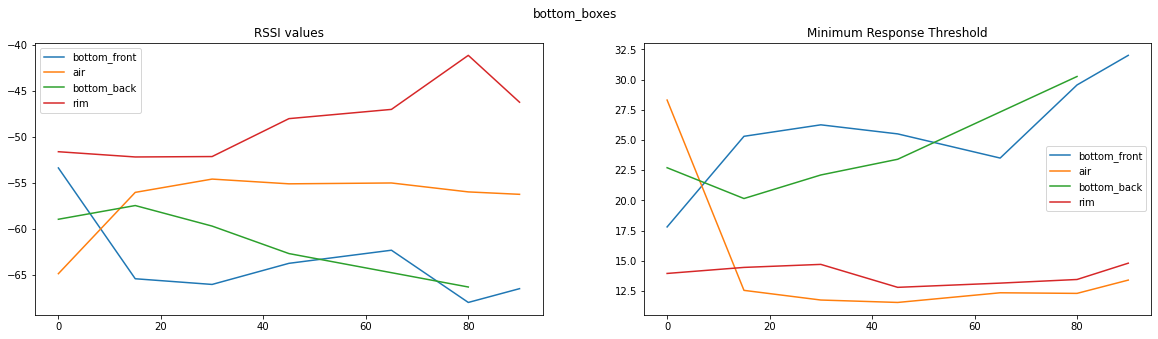

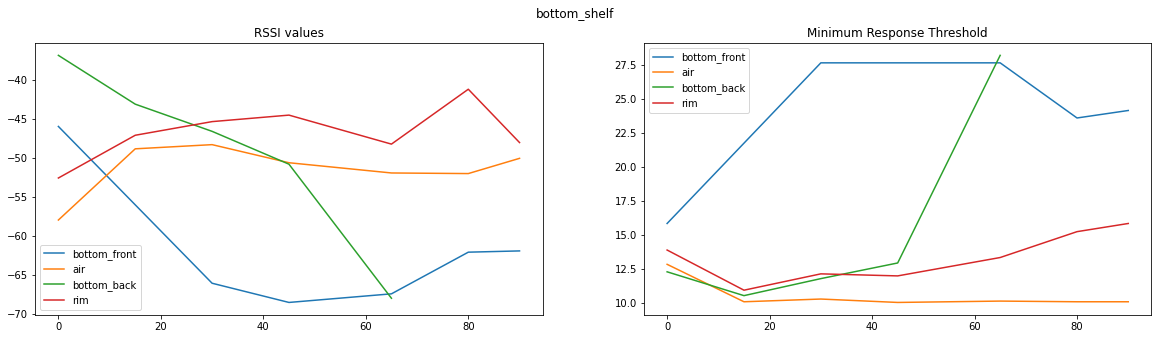

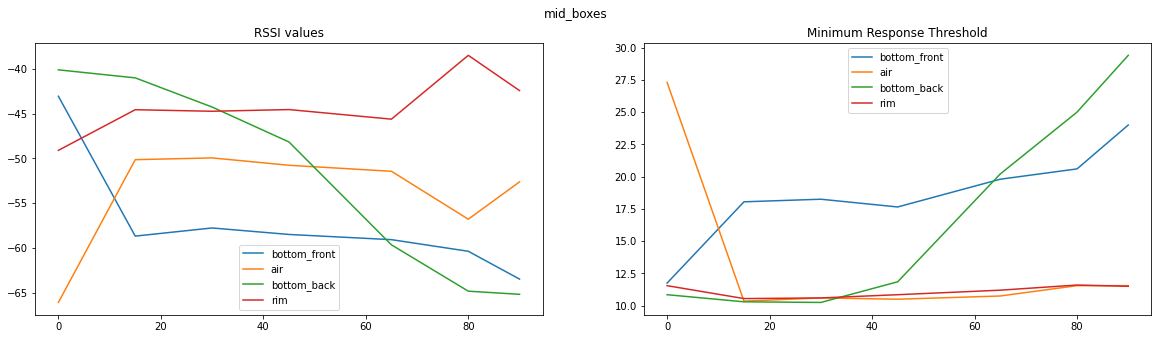

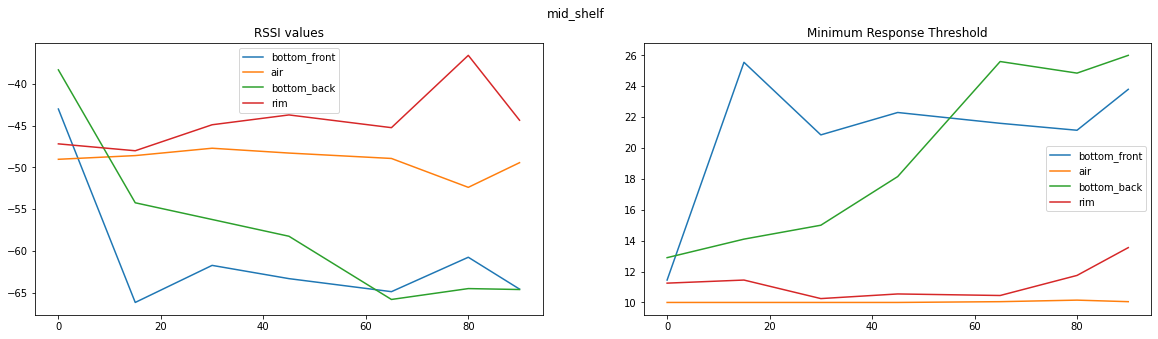

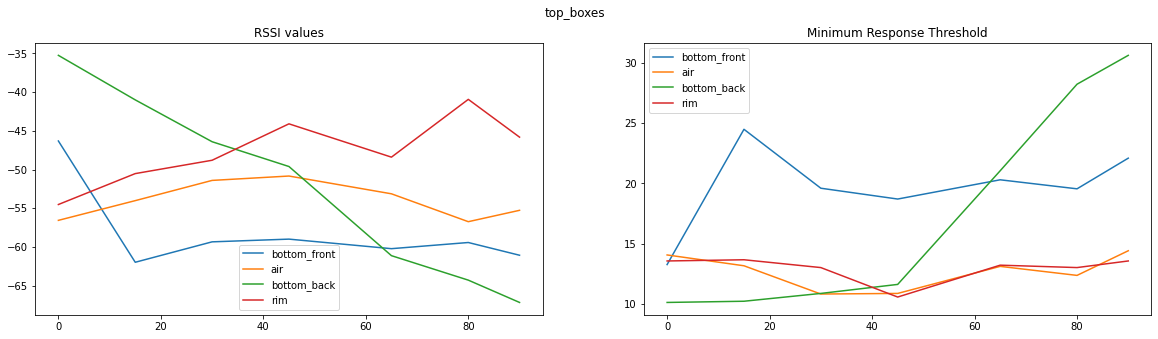

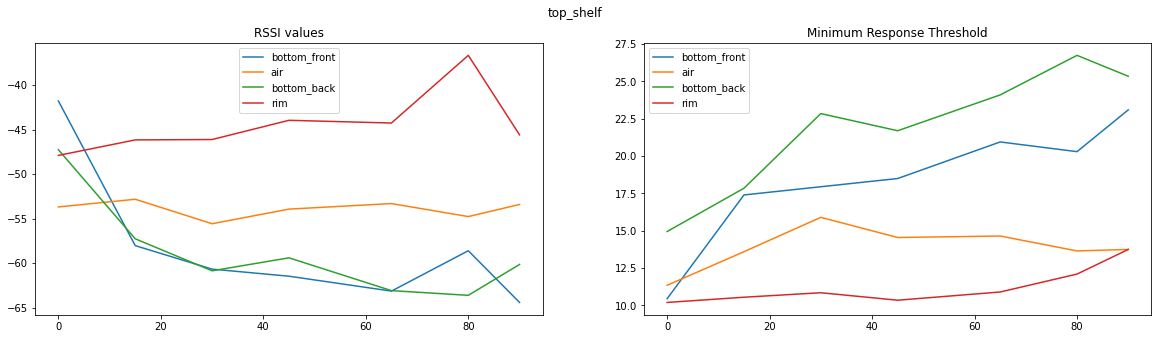

In [57]:
compiled_rssi_readings: Dict[str, dict] = defaultdict(dict)

for key in keys:
    rssi_readings: tuple = plot_rssi(key)
    rssi_ys: np.ndarray = np.array(rssi_readings[0])
    peak_rssi_ys: np.ndarray = np.array(rssi_readings[1])
    mrt_ys: Dict[str, np.ndarray] = rssi_readings[2]
    mrt_xs: Dict[str, List[int]] = rssi_readings[3]
    compiled_rssi_readings[key] = {
        "rssi": rssi_ys,
        "peak_rssi": peak_rssi_ys,
        "mrt": mrt_ys,
        "mrt_xs": mrt_xs
    }
# print("Bottom")
# plot_rssi("bottom_boxes")
# plot_rssi("bottom_shelf")
# print("Mid")
# plot_rssi("mid_boxes")
# plot_rssi("mid_shelf")
# print("Top")
# plot_rssi("top_boxes")
# plot_rssi("top_shelf")

In [45]:
bottom_boxes_mrt: np.ndarray = compiled_rssi_readings["bottom_boxes"]["mrt"]
bottom_boxes_mrt_xs: Dict[str, List[int]] = compiled_rssi_readings["bottom_boxes"]["mrt_xs"]

mid_boxes_mrt: np.ndarray = compiled_rssi_readings["mid_boxes"]["mrt"]
mid_boxes_mrt_xs: Dict[str, List[int]] = compiled_rssi_readings["mid_boxes"]["mrt_xs"]

top_boxes_mrt: np.ndarray = compiled_rssi_readings["top_boxes"]["mrt"]
top_boxes_mrt_xs: Dict[str, List[int]] = compiled_rssi_readings["top_boxes"]["mrt_xs"]

bottom_shelf_mrt: np.ndarray = compiled_rssi_readings["bottom_shelf"]["mrt"]
bottom_shelf_mrt_xs: Dict[str, List[int]] = compiled_rssi_readings["bottom_shelf"]["mrt_xs"]

mid_shelf_mrt: np.ndarray = compiled_rssi_readings["mid_shelf"]["mrt"]
mid_shelf_mrt_xs: Dict[str, List[int]] = compiled_rssi_readings["mid_shelf"]["mrt_xs"]

top_shelf_mrt: np.ndarray = compiled_rssi_readings["top_shelf"]["mrt"]
top_shelf_mrt_xs: Dict[str, List[int]] = compiled_rssi_readings["top_shelf"]["mrt_xs"]

mrt_boxes_positions_ys = [
    bottom_boxes_mrt,
    mid_boxes_mrt,
    top_boxes_mrt
]

mrt_shelf_positions_ys = [
    bottom_shelf_mrt,
    mid_shelf_mrt,
    top_shelf_mrt
]

mrt_boxes_positions_xs = [
    bottom_boxes_mrt_xs,
    mid_boxes_mrt_xs,
    top_boxes_mrt_xs
]

mrt_shelf_positions_xs = [
    bottom_shelf_mrt_xs,
    mid_shelf_mrt_xs,
    top_shelf_mrt_xs
]

In [54]:
def plot_dmrts(mrt_boxes_ys, mrt_shelf_ys, mrt_boxes_xs, mrt_shelf_xs):
    _, axes = plt.subplots(3,2, figsize=(20,15))
    tag_locs = [
        ("bottom_front", "air", "bot_f - air"),
        ("bottom_back", "air", "bot_b - air"),
        ("bottom_front", "rim", "bot_f - rim"),
        ("bottom_back", "rim", "bot_b - rim"),
    ]
    positions = [
        "Bottom {}",
        "Middle {}",
        "Top {}",
    ]
    i = 0
    for box_ys, shelf_ys, box_xs, shelf_xs in zip(mrt_boxes_ys, mrt_shelf_ys, mrt_boxes_xs, mrt_shelf_xs):
        # boxes first
        box_diff_collection = []
        for loc1, loc2, lab in tag_locs:
            ydiff = []
            x_final = []
            for x in xs:
                if x in box_xs[tag_info[loc1]["EPC-96"]] and x in box_xs[tag_info[loc2]["EPC-96"]]:
                    loc1_idx = box_xs[tag_info[loc1]["EPC-96"]].index(x)
                    loc2_idx = box_xs[tag_info[loc2]["EPC-96"]].index(x)
                    diff = box_ys[tag_info[loc1]["EPC-96"]][loc1_idx] - box_ys[tag_info[loc2]["EPC-96"]][loc2_idx]
                    ydiff.append(diff)
                    x_final.append(x)
            assert len(ydiff) == len(x_final), "Length of y and x not same"
            box_diff_collection.append((x_final, ydiff, lab))
        
        shelf_diff_collection = []
        for loc1, loc2, lab in tag_locs:
            ydiff = []
            x_final = []
            for x in xs:
                if x in shelf_xs[tag_info[loc1]["EPC-96"]] and x in shelf_xs[tag_info[loc2]["EPC-96"]]:
                    loc1_idx = shelf_xs[tag_info[loc1]["EPC-96"]].index(x)
                    loc2_idx = shelf_xs[tag_info[loc2]["EPC-96"]].index(x)
                    diff = shelf_ys[tag_info[loc1]["EPC-96"]][loc1_idx] - shelf_ys[tag_info[loc2]["EPC-96"]][loc2_idx]
                    ydiff.append(diff)
                    x_final.append(x)
            assert len(ydiff) == len(x_final), "Length of y and x not same"
            shelf_diff_collection.append((x_final, ydiff, lab))

        
        for box_plot, shelf_plot in zip(box_diff_collection, shelf_diff_collection):
            axes[i][0].plot(box_plot[0], box_plot[1], label=box_plot[2])
            axes[i][1].plot(shelf_plot[0], shelf_plot[1], label=shelf_plot[2])
        
        axes[i][0].set_title(positions[i].format("Boxes"))
        axes[i][0].legend()
        axes[i][1].set_title(positions[i].format("Shelf"))
        axes[i][1].legend()
        i += 1
    
    plt.suptitle("DMRT Plot Comparisons")
    

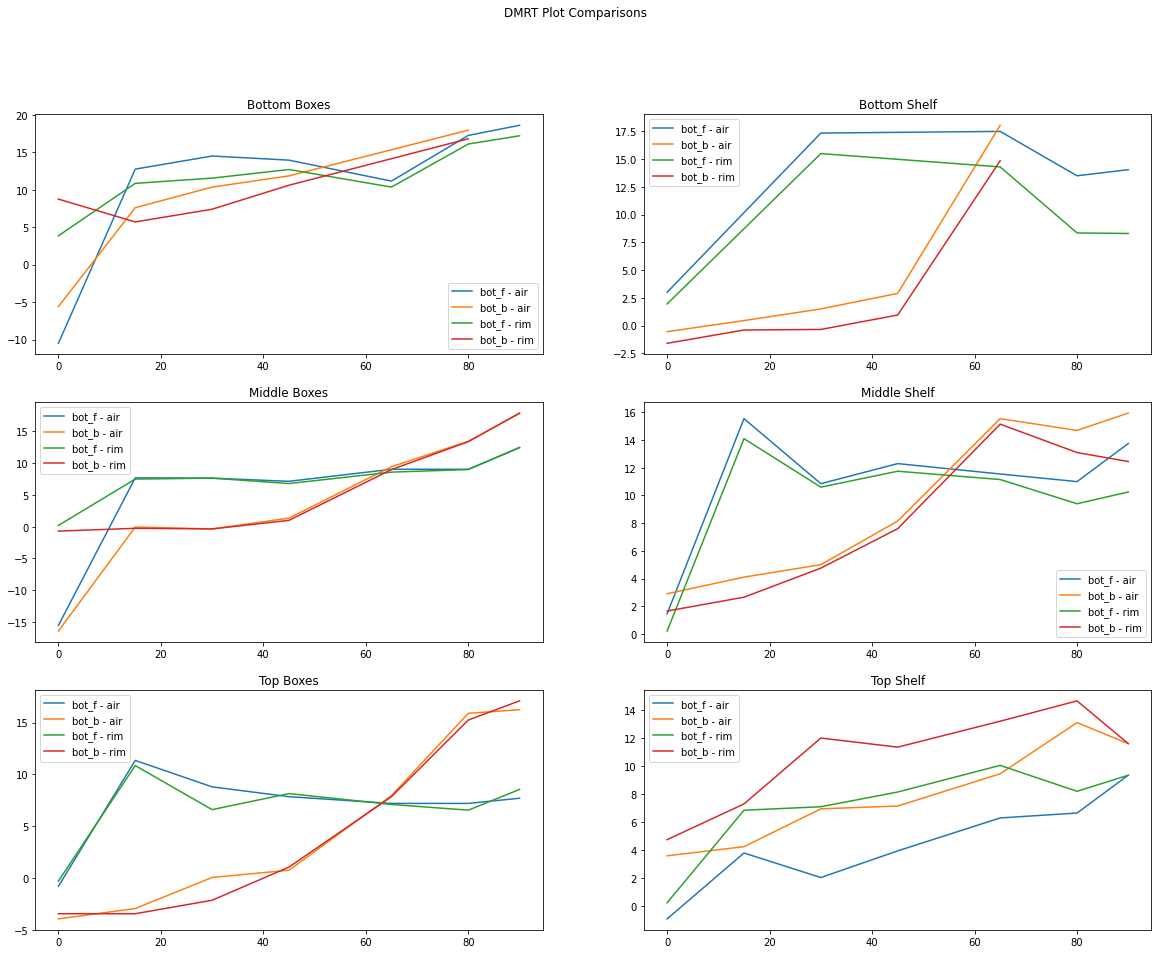

In [55]:
plot_dmrts(mrt_boxes_positions_ys, mrt_shelf_positions_ys, mrt_boxes_positions_xs, mrt_shelf_positions_xs)

In [26]:
print(xs)
print(bottom_boxes_mrt[tag_info["air"]["EPC-96"]].shape)

print(bottom_boxes_mrt[tag_info["bottom_front"]["EPC-96"]].shape)

print(bottom_boxes_mrt[tag_info["bottom_back"]["EPC-96"]].shape)
print(bottom_boxes_mrt_xs[tag_info["bottom_back"]["EPC-96"]])

print(bottom_boxes_mrt[tag_info["rim"]["EPC-96"]].shape)

[0, 15, 30, 45, 65, 80, 90]
(7,)
(7,)
(5,)
[0, 15, 30, 45, 80]
(7,)


In [27]:
print(xs)
print(mid_boxes_mrt[tag_info["air"]["EPC-96"]].shape)

print(mid_boxes_mrt[tag_info["bottom_front"]["EPC-96"]].shape)

print(mid_boxes_mrt[tag_info["bottom_back"]["EPC-96"]].shape)
print(mid_boxes_mrt_xs[tag_info["bottom_back"]["EPC-96"]])

print(mid_boxes_mrt[tag_info["rim"]["EPC-96"]].shape)

[0, 15, 30, 45, 65, 80, 90]
(7,)
(7,)
(7,)
[0, 15, 30, 45, 65, 80, 90]
(7,)


In [28]:
print(xs)
print(top_boxes_mrt[tag_info["air"]["EPC-96"]].shape)

print(top_boxes_mrt[tag_info["bottom_front"]["EPC-96"]].shape)

print(top_boxes_mrt[tag_info["bottom_back"]["EPC-96"]].shape)
print(top_boxes_mrt_xs[tag_info["bottom_back"]["EPC-96"]])

print(top_boxes_mrt[tag_info["rim"]["EPC-96"]].shape)

[0, 15, 30, 45, 65, 80, 90]
(7,)
(7,)
(7,)
[0, 15, 30, 45, 65, 80, 90]
(7,)


In [30]:
print(xs)
print(bottom_shelf_mrt[tag_info["air"]["EPC-96"]].shape)

print(bottom_shelf_mrt[tag_info["bottom_front"]["EPC-96"]].shape)
print(bottom_shelf_mrt_xs[tag_info["bottom_front"]["EPC-96"]])
print(bottom_shelf_mrt[tag_info["bottom_back"]["EPC-96"]].shape)
print(bottom_shelf_mrt_xs[tag_info["bottom_back"]["EPC-96"]])

print(bottom_shelf_mrt[tag_info["rim"]["EPC-96"]].shape)

[0, 15, 30, 45, 65, 80, 90]
(7,)
(5,)
[0, 30, 65, 80, 90]
(5,)
[0, 15, 30, 45, 65]
(7,)


In [31]:
print(xs)
print(mid_shelf_mrt[tag_info["air"]["EPC-96"]].shape)

print(mid_shelf_mrt[tag_info["bottom_front"]["EPC-96"]].shape)
print(mid_shelf_mrt_xs[tag_info["bottom_front"]["EPC-96"]])
print(mid_shelf_mrt[tag_info["bottom_back"]["EPC-96"]].shape)
print(mid_shelf_mrt_xs[tag_info["bottom_back"]["EPC-96"]])

print(mid_shelf_mrt[tag_info["rim"]["EPC-96"]].shape)

[0, 15, 30, 45, 65, 80, 90]
(7,)
(7,)
[0, 15, 30, 45, 65, 80, 90]
(7,)
[0, 15, 30, 45, 65, 80, 90]
(7,)


In [32]:
print(xs)
print(top_shelf_mrt[tag_info["air"]["EPC-96"]].shape)

print(top_shelf_mrt[tag_info["bottom_front"]["EPC-96"]].shape)
print(top_shelf_mrt_xs[tag_info["bottom_front"]["EPC-96"]])
print(top_shelf_mrt[tag_info["bottom_back"]["EPC-96"]].shape)
print(top_shelf_mrt_xs[tag_info["bottom_back"]["EPC-96"]])

print(top_shelf_mrt[tag_info["rim"]["EPC-96"]].shape)

[0, 15, 30, 45, 65, 80, 90]
(7,)
(7,)
[0, 15, 30, 45, 65, 80, 90]
(7,)
[0, 15, 30, 45, 65, 80, 90]
(7,)


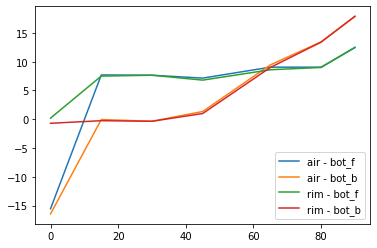

In [41]:
mid_boxes_mrt_air_front_diff = mid_boxes_mrt[tag_info["bottom_front"]["EPC-96"]] - mid_boxes_mrt[tag_info["air"]["EPC-96"]]
mid_boxes_mrt_air_back_diff = mid_boxes_mrt[tag_info["bottom_back"]["EPC-96"]] - mid_boxes_mrt[tag_info["air"]["EPC-96"]]

mid_boxes_mrt_rim_front_diff = mid_boxes_mrt[tag_info["bottom_front"]["EPC-96"]] - mid_boxes_mrt[tag_info["rim"]["EPC-96"]]
mid_boxes_mrt_rim_back_diff = mid_boxes_mrt[tag_info["bottom_back"]["EPC-96"]] - mid_boxes_mrt[tag_info["rim"]["EPC-96"]]

mid_boxes_mrt_xs = xs

plt.plot(xs, mid_boxes_mrt_air_front_diff, label="air - bot_f")
plt.plot(xs, mid_boxes_mrt_air_back_diff, label="air - bot_b")

plt.plot(xs, mid_boxes_mrt_rim_front_diff, label="rim - bot_f")
plt.plot(xs, mid_boxes_mrt_rim_back_diff, label="rim - bot_b")
plt.legend()
plt.show()

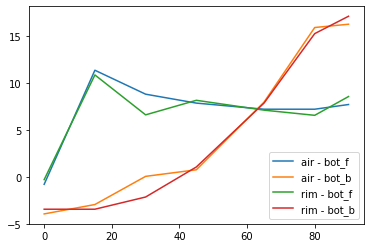

In [40]:
top_boxes_mrt_air_front_diff = top_boxes_mrt[tag_info["bottom_front"]["EPC-96"]] - top_boxes_mrt[tag_info["air"]["EPC-96"]]
top_boxes_mrt_air_back_diff = top_boxes_mrt[tag_info["bottom_back"]["EPC-96"]] - top_boxes_mrt[tag_info["air"]["EPC-96"]]

top_boxes_mrt_rim_front_diff = top_boxes_mrt[tag_info["bottom_front"]["EPC-96"]] - top_boxes_mrt[tag_info["rim"]["EPC-96"]]
top_boxes_mrt_rim_back_diff = top_boxes_mrt[tag_info["bottom_back"]["EPC-96"]] - top_boxes_mrt[tag_info["rim"]["EPC-96"]]

top_boxes_mrt_xs = xs

plt.plot(xs, top_boxes_mrt_air_front_diff, label="air - bot_f")
plt.plot(xs, top_boxes_mrt_air_back_diff, label="air - bot_b")

plt.plot(xs, top_boxes_mrt_rim_front_diff, label="rim - bot_f")
plt.plot(xs, top_boxes_mrt_rim_back_diff, label="rim - bot_b")
plt.legend()
plt.show()

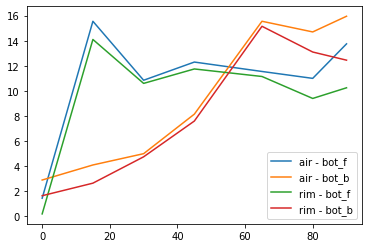

In [39]:
mid_shelf_mrt_air_front_diff = mid_shelf_mrt[tag_info["bottom_front"]["EPC-96"]] - mid_shelf_mrt[tag_info["air"]["EPC-96"]]
mid_shelf_mrt_air_back_diff = mid_shelf_mrt[tag_info["bottom_back"]["EPC-96"]] - mid_shelf_mrt[tag_info["air"]["EPC-96"]]

mid_shelf_mrt_rim_front_diff = mid_shelf_mrt[tag_info["bottom_front"]["EPC-96"]] - mid_shelf_mrt[tag_info["rim"]["EPC-96"]]
mid_shelf_mrt_rim_back_diff = mid_shelf_mrt[tag_info["bottom_back"]["EPC-96"]] - mid_shelf_mrt[tag_info["rim"]["EPC-96"]]

mid_shelf_mrt_xs = xs

plt.plot(xs, mid_shelf_mrt_air_front_diff, label="air - bot_f")
plt.plot(xs, mid_shelf_mrt_air_back_diff, label="air - bot_b")

plt.plot(xs, mid_shelf_mrt_rim_front_diff, label="rim - bot_f")
plt.plot(xs, mid_shelf_mrt_rim_back_diff, label="rim - bot_b")
plt.legend()
plt.show()

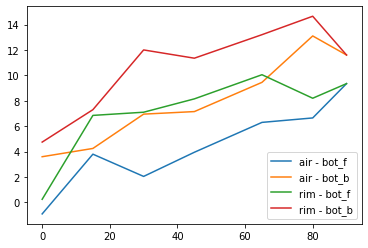

In [42]:
top_shelf_mrt_air_front_diff = top_shelf_mrt[tag_info["bottom_front"]["EPC-96"]] - top_shelf_mrt[tag_info["air"]["EPC-96"]]
top_shelf_mrt_air_back_diff = top_shelf_mrt[tag_info["bottom_back"]["EPC-96"]] - top_shelf_mrt[tag_info["air"]["EPC-96"]]

top_shelf_mrt_rim_front_diff = top_shelf_mrt[tag_info["bottom_front"]["EPC-96"]] - top_shelf_mrt[tag_info["rim"]["EPC-96"]]
top_shelf_mrt_rim_back_diff = top_shelf_mrt[tag_info["bottom_back"]["EPC-96"]] - top_shelf_mrt[tag_info["rim"]["EPC-96"]]

top_shelf_mrt_xs = xs

plt.plot(xs, top_shelf_mrt_air_front_diff, label="air - bot_f")
plt.plot(xs, top_shelf_mrt_air_back_diff, label="air - bot_b")

plt.plot(xs, top_shelf_mrt_rim_front_diff, label="rim - bot_f")
plt.plot(xs, top_shelf_mrt_rim_back_diff, label="rim - bot_b")
plt.legend()
plt.show()